In [71]:
import pandas as pd
import numpy as np

# Thực hành 6: phân cụm dữ liệu
## 1. Đọc dữ liệu

In [72]:
df = pd.read_csv("Ordinal_Data.csv", sep = ",")
df.head(10)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
5,84,Female,NaN,Mild,Bangalore,Yes
6,14,Male,101.0,Strong,Bangalore,No
7,20,Female,NaN,Strong,Mumbai,Yes
8,19,Female,100.0,Strong,Bangalore,No
9,64,Female,101.0,Mild,Delhi,No


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## 2. Xử lý dữ liệu

In [74]:
#Kiểm tra dữ liệu các cột
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [75]:
#ta thấy cột dữ liệu fever bị thiếu
# thực hiện xóa các dòng bị thiếu dữ liệu
df = df.dropna(subset = ["fever"])
df.head(10)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
6,14,Male,101.0,Strong,Bangalore,No
8,19,Female,100.0,Strong,Bangalore,No
9,64,Female,101.0,Mild,Delhi,No
11,65,Female,98.0,Mild,Mumbai,Yes
12,25,Female,99.0,Strong,Kolkata,No


In [76]:
#chuyển dữ liệu gender sang 0 1
df.replace(["Male", "Female"],[1, 0], inplace = True)

In [77]:
df.head(10)

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,Mild,Kolkata,No
1,27,1,100.0,Mild,Delhi,Yes
2,42,1,101.0,Mild,Delhi,No
3,31,0,98.0,Mild,Kolkata,No
4,65,0,101.0,Mild,Mumbai,No
6,14,1,101.0,Strong,Bangalore,No
8,19,0,100.0,Strong,Bangalore,No
9,64,0,101.0,Mild,Delhi,No
11,65,0,98.0,Mild,Mumbai,Yes
12,25,0,99.0,Strong,Kolkata,No


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        90 non-null     int64  
 1   gender     90 non-null     int64  
 2   fever      90 non-null     float64
 3   cough      90 non-null     object 
 4   city       90 non-null     object 
 5   has_covid  90 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.9+ KB


In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [80]:
df.cough.unique()

array(['Mild', 'Strong'], dtype=object)

In [81]:
df = pd.get_dummies(df, dtype = int)
df.head(10)

,age,gender,fever,cough_Mild,cough_Strong,city_Bangalore,city_Delhi,city_Kolkata,city_Mumbai,has_covid_No,has_covid_Yes
0,60,1,103.0,1,0,0,0,1,0,1,0
1,27,1,100.0,1,0,0,1,0,0,0,1
2,42,1,101.0,1,0,0,1,0,0,1,0
3,31,0,98.0,1,0,0,0,1,0,1,0
4,65,0,101.0,1,0,0,0,0,1,1,0
6,14,1,101.0,0,1,1,0,0,0,1,0
8,19,0,100.0,0,1,1,0,0,0,1,0
9,64,0,101.0,1,0,0,1,0,0,1,0
11,65,0,98.0,1,0,0,0,0,1,0,1
12,25,0,99.0,0,1,0,0,1,0,1,0


In [82]:
from sklearn.decomposition import PCA

In [83]:
def PCA_decompose(data):
    pca = PCA(n_components = 2)
    pca.fit(data)
    return pca.transform(data)

In [84]:
df_decompose = pd.DataFrame(PCA_decompose(df))
df_decompose

,0,1
0,16.950721,2.260685
1,-16.042207,-0.898190
2,-1.041700,0.220366
3,-12.041402,-2.767408
4,21.958005,0.222421
...,...,...
85,-31.048162,3.165689
86,7.951931,0.073685
87,-23.043742,0.191350
88,-38.036849,-2.927779


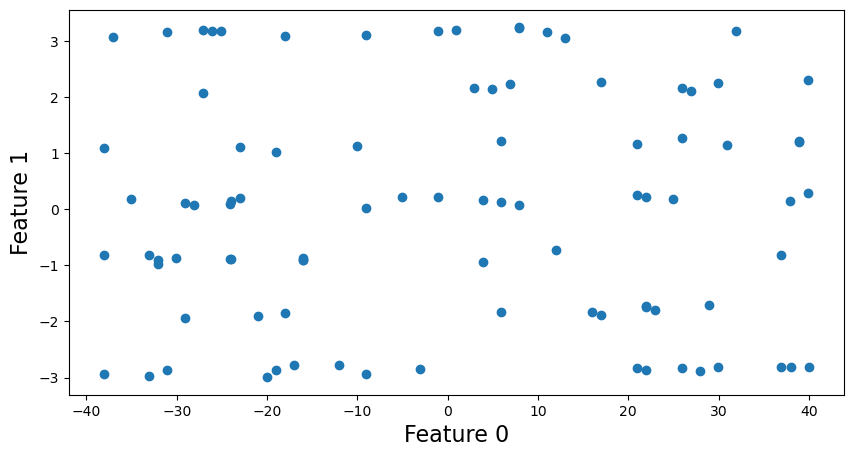

In [85]:
#vẽ sơ đồ phân tán
plt.figure(figsize = (10, 5))
plt.xlabel('Feature 0', fontsize = 16)
plt.ylabel('Feature 1', fontsize = 16)
plt.scatter(df_decompose.iloc[:, 0], df_decompose.iloc[:, 1])

In [86]:
#Lựa chọn k vựa vào elbow plot
def k_selection(data, max_k):
    means = [] # luu cac gia tri cua k
    inertia = [] #luu cac inertia
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, random_state = 1)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)
    # vẽ elbow plot
    plt.figure(figsize = (16, 8))
    plt.plot(means, inertia, 'bx-')
    plt.xlabel('Values of K', fontsize = 16)
    plt.ylabel('Inertia', fontsize = 16)
    plt.title('Elbow plot', fontsize = 16)

C:\Users\CMS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CMS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CMS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CMS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

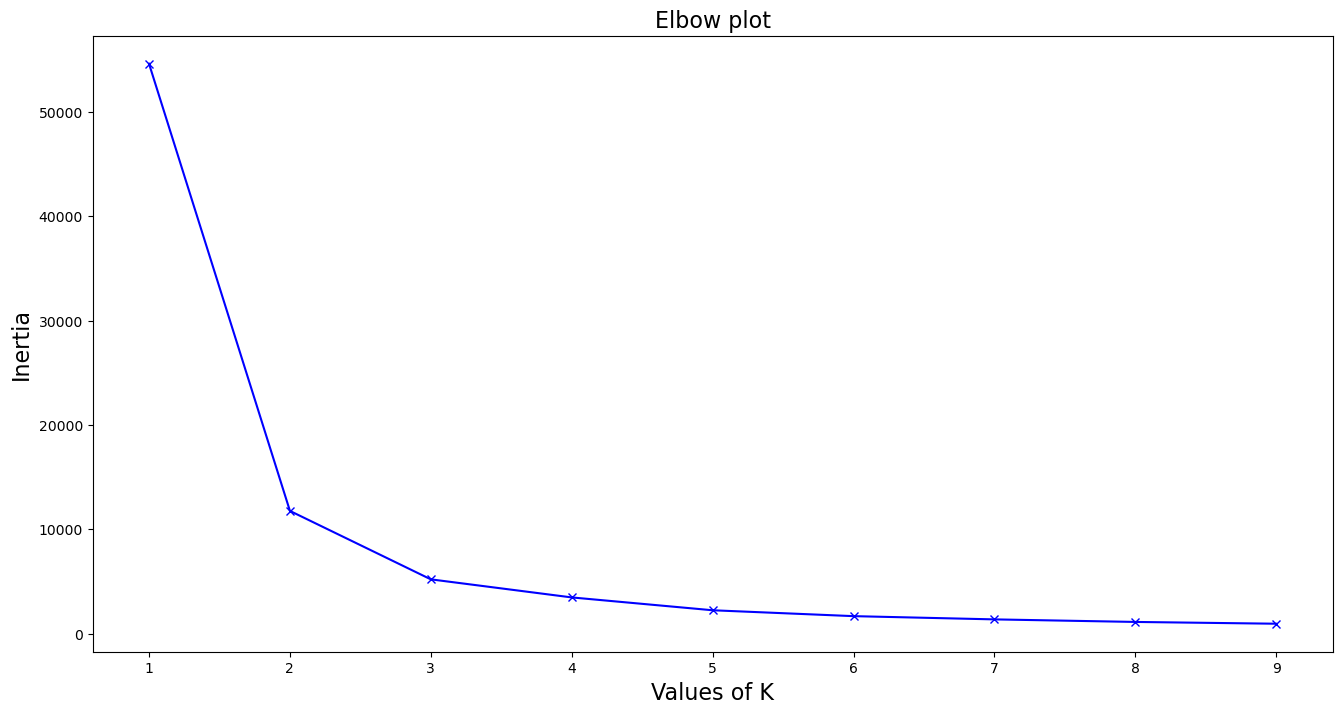

In [87]:
k_selection(df, 10)

In [88]:
kMean = KMeans(n_clusters = 5, random_state = 0)
kMean.fit(df)
label = kMean.labels_
pd.DataFrame(label)

C:\Users\CMS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\CMS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,0
0,3
1,4
2,0
3,4
4,3
...,...
85,2
86,0
87,2
88,2


In [89]:
print("SSE (Sum Squared Error) =",kMean.inertia_)

SSE (Sum Squared Error) = 2227.8887820512823


In [90]:
np.set_printoptions(precision = 8, suppress = True)
kMean.cluster_centers_

array([[ 48.38888889,   0.44444444, 102.        ,   0.55555556,
          0.44444444,   0.33333333,   0.22222222,   0.33333333,
          0.11111111,   0.72222222,   0.27777778],
       [ 79.23076923,   0.38461538, 100.76923077,   0.69230769,
          0.30769231,   0.23076923,   0.30769231,   0.23076923,
          0.23076923,   0.53846154,   0.46153846],
       [ 13.36      ,   0.36      , 101.04      ,   0.68      ,
          0.32      ,   0.36      ,   0.12      ,   0.4       ,
          0.12      ,   0.6       ,   0.4       ],
       [ 65.83333333,   0.38888889, 100.11111111,   0.66666667,
          0.33333333,   0.33333333,   0.22222222,   0.22222222,
          0.22222222,   0.61111111,   0.38888889],
       [ 28.375     ,   0.4375    , 100.125     ,   0.5625    ,
          0.4375    ,   0.25      ,   0.3125    ,   0.375     ,
          0.0625    ,   0.375     ,   0.625     ]])

In [91]:
df_decompose["Labels"] = kMean.labels_
df_decompose

,0,1,Labels
0,16.950721,2.260685,3
1,-16.042207,-0.898190,4
2,-1.041700,0.220366,0
3,-12.041402,-2.767408,4
4,21.958005,0.222421,3
...,...,...,...
85,-31.048162,3.165689,2
86,7.951931,0.073685,0
87,-23.043742,0.191350,2
88,-38.036849,-2.927779,2


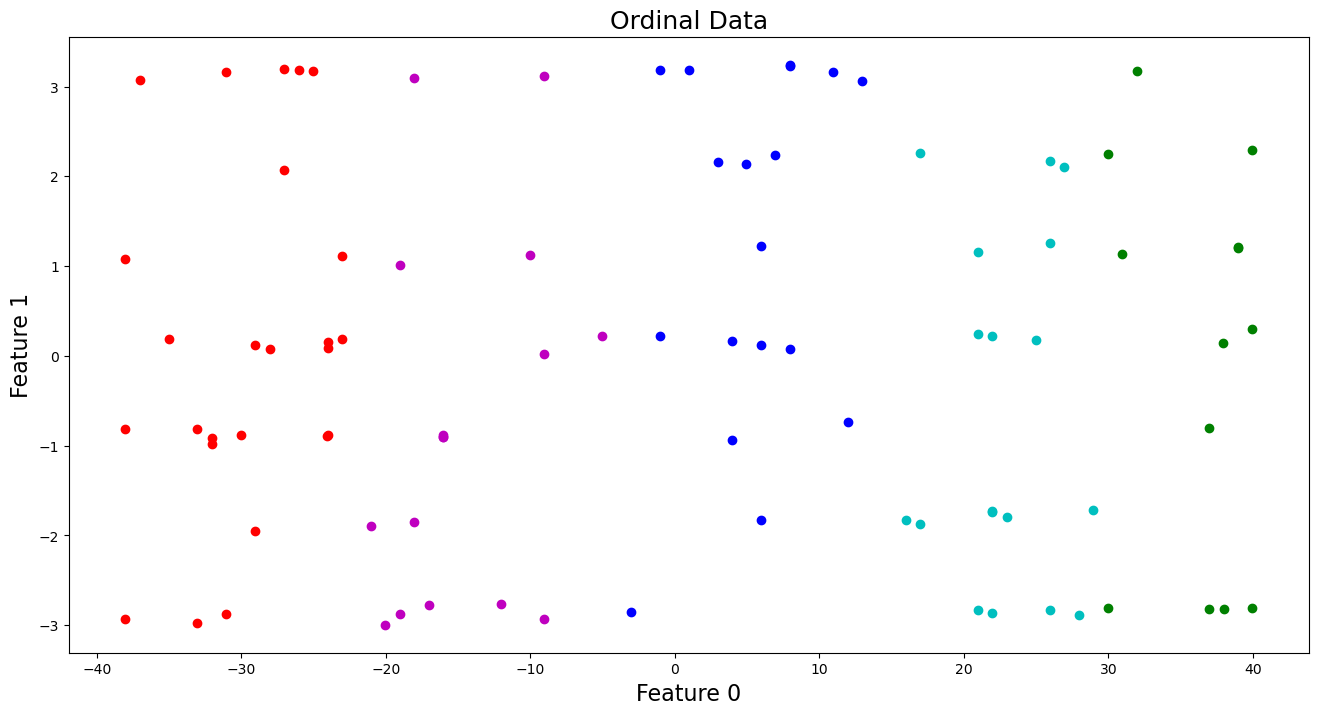

In [92]:
# Plot All K-Means Clusters
#Getting unique labels
plt.figure(figsize = (16, 8))
plt.xlabel('Feature 0', fontsize = 16)
plt.ylabel('Feature 1', fontsize = 16)
plt.title("Ordinal Data", fontsize = 18)

u_labels = np.unique(kMean.labels_)

plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# vẽ kết quả
for i in u_labels:
    filtered_label = df_decompose[kMean.labels_ == i]
    plt.scatter(filtered_label[[0]], filtered_label[[1]], color = plt_colors[i],)

# Thuật toán Apriori

In [93]:
import mlxtend

In [94]:
#1. Read data
data = pd.read_table("chipotle.tsv")
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [68]:
#kiểm tra xem có dữ liệu trống không
data.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [95]:
#2. CHUYỂN DỮ LIỆU SANG DẠNG GIAO DỊCH
#2. 1 lOẠI BỎ GIÁ TRỊ THIẾU
data.dropna(subset = ['order_id', 'item_name'], inplace = True)

#2.2 NHÓM SẢN PHẨM THEO 'order_id'
trans = data.groupby('order_id')['item_name'].apply(list).values.tolist()

trans[:5]

[['Chips and Fresh Tomato Salsa',
  'Izze',
  'Nantucket Nectar',
  'Chips and Tomatillo-Green Chili Salsa'],
 ['Chicken Bowl'],
 ['Chicken Bowl', 'Side of Chips'],
 ['Steak Burrito', 'Steak Soft Tacos'],
 ['Steak Burrito', 'Chips and Guacamole']]

In [96]:
#3. MÃ HÓA DỮ LIỆU GIAO DỊCH
from mlxtend.preprocessing import TransactionEncoder

In [98]:
te = TransactionEncoder()

te_ary = te.fit(trans).transform(trans)
data_encoded = pd.DataFrame(te_ary, columns = te.columns_, dtype = int)

# Kiểm tra dữ liệu mã hóa
data_encoded.head()

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
data_encoded.shape

(1834, 50)

In [102]:
#4. Áp dụng thuật toán Apriori
from mlxtend.frequent_patterns import apriori, association_rules

# Sinh ra các item thường xuất hiện
freq_itemsets = apriori(data_encoded, min_support = 0.01, use_colnames = True)

#Hiển thị các item thường xuất hiện
freq_itemsets.head(30)

C:\Users\CMS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.029444,(6 Pack Soft Drink)
1,0.033261,(Barbacoa Bowl)
2,0.047983,(Barbacoa Burrito)
3,0.013631,(Barbacoa Soft Tacos)
4,0.083969,(Bottled Water)
5,0.051254,(Canned Soda)
6,0.150491,(Canned Soft Drink)
7,0.036532,(Carnitas Bowl)
8,0.031625,(Carnitas Burrito)
9,0.020720,(Carnitas Soft Tacos)


In [106]:
#Generate association rules
rules = association_rules(freq_itemsets, metric = 'confidence', min_threshold = 0.36)

#Display rules sorted by "confidence"
rules[['antecedents','consequents','antecedent support','support','confidence']].sort_values("confidence", ascending=True)


,antecedents,consequents,antecedent support,support,confidence
9,"(Canned Soft Drink, Chips and Guacamole)",(Chicken Bowl),0.033806,0.012541,0.370968
2,(Canned Soda),(Steak Burrito),0.051254,0.019629,0.382979
0,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.011450,0.388889
3,(Canned Soft Drink),(Chicken Bowl),0.150491,0.060523,0.402174
6,"(Chicken Bowl, Bottled Water)",(Chips),0.037623,0.015267,0.405797
1,(Bottled Water),(Chicken Bowl),0.083969,0.037623,0.448052
4,(Chips),(Chicken Bowl),0.113413,0.066521,0.586538
8,"(Canned Soft Drink, Chips)",(Chicken Bowl),0.031625,0.019084,0.603448
5,(Chips and Tomatillo Red Chili Salsa),(Chicken Bowl),0.025082,0.015812,0.630435
7,"(Bottled Water, Chips)",(Chicken Bowl),0.019084,0.015267,0.800000


In [109]:
#xuất dữ liệu
rules.to_csv("result.csv")